### Deep Q Learning - Naviagation of a Banana Field 



## 0. Setup

To run any of the other sections 1,2,3,4 and 5. You need to execute the cells in this section first.


Import **TheAgent class** ( requires agent.py , envhelper.py and qnet.py in same directory as this, or findable  ). Along with other dependencies as outlined in the README.MD of this repository.


In [1]:
# import from agent.py the class TheAgent
from agent import TheAgent
# for ploting results 
import numpy as np
import matplotlib.pyplot as plt

**Important** Set the constant AGENT_FILE to the unity ml_agenet binary

In [2]:
AGENT_FILE = '../../Banana_Linux/Banana.x86_64' 

Set the hyper parameters ( which also includes ) in this HYPER_PARAMS object class.

In [3]:
class HYPER_PARAMS(object):     
    FC1 = 18
    FC2 = 18
    REPLAY_BUFFER_SIZE = 60000
    MINIBATCH_SIZE = 64
    UPDATE_EVERY = 6
    GAMMA = 0.99
    ALPHA = 0.001
    TAU = 0.01
    EPS_START = 1.0
    EPS_END   = 0.01
    EPS_DECAY = 0.998
    # make constant(ish) 
    def __setattr__(self, *_):     
        pass 
    

## 1. Train The Agent

Train the agent by executing code cell below ( it may take a while ), it will use the hyperparamets given above.

On completion model weights are saved in 'model.pt' or whatever model_name you give to agent.train() .

Set viewer = True in agent.start if you want to view the environment during training.


In [4]:
# train the agent 
try:
    agent = TheAgent( AGENT_FILE , seed = 12345 )   # pass the agent environment 
    agent.start( viewer = False )   # start environment without viewer 
    agent.train( HYPER_PARAMS , max_episodes = 5000 , model_name ='model.pt' )  # train agent with upto max_episodes
finally:
    agent.end()  


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


  100 ,   0.120
  200 ,   0.720
  300 ,   2.980
  400 ,   4.860
  500 ,   7.410
  600 ,   9.090
  700 ,   9.970
  800 ,  11.210
  900 ,  11.570
 1000 ,  12.560
 1006 ,  12.970
Solved after 907 episodes with mean score of = 13.030 after 100 episodes
Model saved as model.pt


### Visualize Training Scores

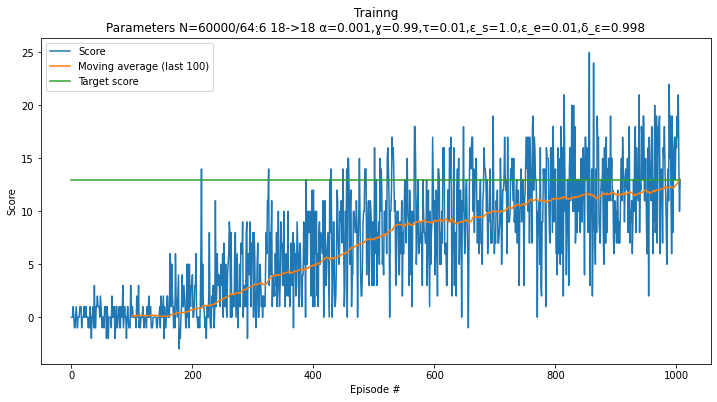

In [5]:
# compute a moving average over last 100 scores.
mavg = [ np.array( agent.scores[i-100:i]).sum() / 100  for i in range( 100 , len( agent.scores))] 
H = HYPER_PARAMS 
fig = plt.figure( figsize=(12,6))
ax = fig.add_subplot(111)
plt.title( f"Trainng\nParameters N={H.REPLAY_BUFFER_SIZE}/{H.MINIBATCH_SIZE}:{H.UPDATE_EVERY} {H.FC1}->{H.FC2} α={H.ALPHA},ɣ={H.GAMMA},τ={H.TAU},ε_s={H.EPS_START},ε_e={H.EPS_END},δ_ε={H.EPS_DECAY}" )
plt.plot(np.arange(len(agent.scores)), agent.scores)
plt.plot(np.arange(len(mavg))+100, mavg )
plt.plot(np.arange(len(agent.scores)), np.ones(len(agent.scores))*13 )
plt.legend( ['Score','Moving average (last 100)','Target score'])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [6]:
 # delete agent 
try:
    del agent
except:
    pass

## 2. Validation Run

Make sure the trained model, actually still can obtain an average of >= 13 , over 100 episodes.
We use another fixed seed - so we are not generating the same first 100 episodes that we trained on.

In [7]:
try:
    agent = TheAgent( AGENT_FILE , seed = 50000 )  
    agent.start( viewer = False )     
    agent.play( HYPER_PARAMS , 100 ,  train_mode = True  ,model_name = 'model.pt' ) 
finally:
    agent.end()  

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Visualize Validation Scores

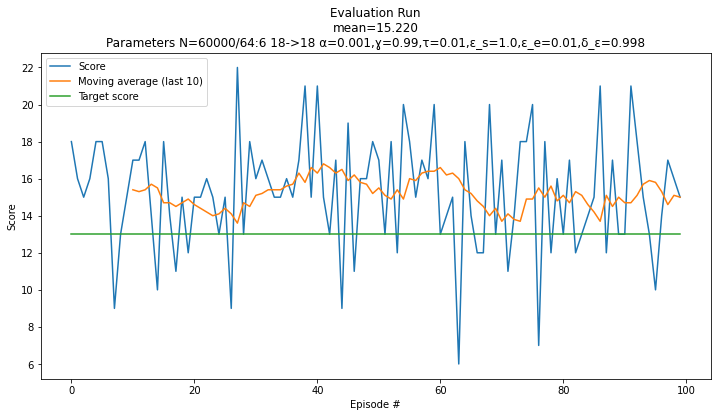

In [8]:
# PLOT 
mavg = [ np.array( agent.scores[i-10:i]).sum() / 10  for i in range( 10 , len( agent.scores))] 
H = HYPER_PARAMS 
fig = plt.figure( figsize=(12,6))
ax = fig.add_subplot(111)
plt.title( f"Evaluation Run\nmean={np.mean( agent.scores ):.3f}\nParameters N={H.REPLAY_BUFFER_SIZE}/{H.MINIBATCH_SIZE}:{H.UPDATE_EVERY} {H.FC1}->{H.FC2} α={H.ALPHA},ɣ={H.GAMMA},τ={H.TAU},ε_s={H.EPS_START},ε_e={H.EPS_END},δ_ε={H.EPS_DECAY}" )

plt.plot(np.arange(len(agent.scores)), agent.scores)
plt.plot(np.arange(len(mavg))+10, mavg )
plt.plot(np.arange(len(agent.scores)), np.ones(len(agent.scores))*13 )
plt.legend( ['Score','Moving average (last 10)','Target score'])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [9]:
# delete the agent
try:
    del agent
except:
    pass

## 3. Play

Set agent.start( viewer = False ) if no graphics required.

NB: We set the seed to something random ( to get a different play experience each time ), as during training we fix the randomness of the environment - so we can better see that effects of tweaking the hyper parameters.

In [10]:
try:
    agent = TheAgent( AGENT_FILE , seed=np.random.RandomState(None).randint(50000) )  
    agent.start( viewer = True )     
    agent.play( HYPER_PARAMS , 1 ,  train_mode = False  ,model_name = 'model.pt' ) 
    print ( f'Score {agent.scores[0]}' )

finally:
    #agent.end() 
    pass

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score 15.0


In [11]:
# delete the agent
try:
    del agent
except:
    pass